## **Import**

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

### **Data loading**

In [414]:
datasets = {
    "raw_data_age": pd.read_csv("../data/IRCC_AdhocSR_PR_0001_E.csv", index_col=0),
    "raw_data_census": pd.read_csv("../data/IRCC_AdhocSR_PR_0002_E.csv", encoding='ISO-8859-1', index_col=0),
    "raw_data_birth_country": pd.read_csv("../data/IRCC_AdhocSR_PR_0003_E.csv", index_col=0),
    "raw_data_citizenship": pd.read_csv("../data/IRCC_AdhocSR_PR_0004_E.csv", index_col=0),
    "raw_data_education": pd.read_csv("../data/IRCC_AdhocSR_PR_0005_E.csv",index_col=0),
    "raw_data_gender": pd.read_csv("../data/IRCC_AdhocSR_PR_0006_E.csv", index_col=0),
    "raw_data_legal_status": pd.read_csv("../data/IRCC_AdhocSR_PR_0007_E.csv", index_col=0),
    "raw_data_marital_status": pd.read_csv("../data/IRCC_AdhocSR_PR_0008_E.csv",index_col=0),
    "noc_2011": pd.read_csv("../data/IRCC_AdhocSR_PR_0009_E.csv", encoding='ISO-8859-1', index_col=0),
    "raw_data_preferred_language": pd.read_csv("../data/IRCC_AdhocSR_PR_0010_E.csv", index_col=0),
    "raw_data_province": pd.read_csv("../data/IRCC_AdhocSR_PR_0011_E.csv", index_col=0),
    "raw_data_skill_level_2": pd.read_csv("../data/IRCC_AdhocSR_PR_0012_E.csv", index_col=0),
}

## **Data processing**

In [415]:
from pprint import pprint

for dataset in datasets.values():
    dataset.reset_index(inplace=True)
        # Check and convert 'persons_count' if it exists
    if "persons_count" in dataset.columns:
        dataset["persons_count"] = pd.to_numeric(dataset["persons_count"], errors="coerce")
    
    # Alternatively, check and convert 'permit_holders' if it exists
    elif "permit_holders" in dataset.columns:
        dataset["permit_holders"] = pd.to_numeric(dataset["permit_holders"], errors="coerce")

    # Check and rename 'persons_count' if it exists
    if "persons_count" in dataset.columns:
        new_name = f"persons_count_{dataset.columns[2][:5]}"
        dataset.rename(columns={"persons_count": new_name}, inplace=True)
    
    # Check and rename 'permit_holders' if it exists
    if "permit_holders" in dataset.columns:
        new_name = f"permit_holders_{dataset.columns[2][:5]}"
        dataset.rename(columns={"permit_holders": new_name}, inplace=True)
    
    # dataset.rename(columns={col: col + dataset.columns[2][:5] for col in dataset.columns if col != 'landing_year'}, inplace=True)
    
    # print(dataset.info())
    # pprint(dataset.sample(5))
    # pprint(dataset.columns)

In [416]:
for dataset in datasets.values():
    pprint(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   persons_count_perso         118 non-null    float64
 1   landing_year                119 non-null    int64  
 2   person_age_level1_eng_desc  119 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   persons_count_censu                2637 non-null   float64
 1   landing_year                       2749 non-null   int64  
 2   census_metropolitan_area_eng_desc  2749 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 64.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

## **Age data**

In [417]:
datasets["raw_data_age"]["person_age_level1_eng_desc"].unique()

array(['0 to 14 years old', '15 to 29 years old', '30 to 44 years old',
       '45 to 59 years old', '60 to 74 years old', '75 years old or more',
       'Not stated'], dtype=object)

In [418]:
datasets["raw_data_age"].groupby("person_age_level1_eng_desc").sum()

,persons_count_perso,landing_year
person_age_level1_eng_desc,,
0 to 14 years old,897610.0,34136
15 to 29 years old,1241990.0,34136
30 to 44 years old,1511255.0,34136
45 to 59 years old,426385.0,34136
60 to 74 years old,180520.0,34136
75 years old or more,30715.0,34136
Not stated,485.0,34136


In [419]:
age_dataset = datasets["raw_data_age"].drop(columns="landing_year")
age_dataset = age_dataset[age_dataset.person_age_level1_eng_desc != "Not stated"]

In [420]:
age_dataset.sample(5)

,persons_count_perso,person_age_level1_eng_desc
57,73375.0,15 to 29 years old
50,72520.0,15 to 29 years old
68,1690.0,75 years old or more
23,76350.0,30 to 44 years old
95,21220.0,60 to 74 years old


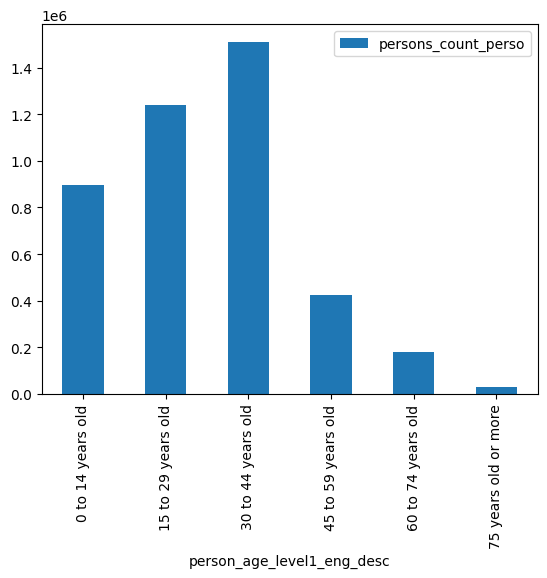

In [421]:
age_dataset.groupby("person_age_level1_eng_desc").sum().plot(kind="bar");

In [422]:
summed_by_age = pd.DataFrame(age_dataset.groupby("person_age_level1_eng_desc").sum()).reset_index()
summed_by_age

,person_age_level1_eng_desc,persons_count_perso
0,0 to 14 years old,897610.0
1,15 to 29 years old,1241990.0
2,30 to 44 years old,1511255.0
3,45 to 59 years old,426385.0
4,60 to 74 years old,180520.0
5,75 years old or more,30715.0


In [423]:
total_pr_receivers = age_dataset.groupby("person_age_level1_eng_desc").sum().sum()
total_pr_receivers

persons_count_perso    4288475.0
dtype: float64

In [424]:
result_dict = {}
for age, amount in zip(summed_by_age["person_age_level1_eng_desc"], summed_by_age["persons_count_perso"]):
    a = amount / total_pr_receivers * 100
    result_dict[age] = round(a.iloc[0], 4)
    print(f"{age} = {round(a.iloc[0], 4)}")

0 to 14 years old = 20.9308
15 to 29 years old = 28.9611
30 to 44 years old = 35.2399
45 to 59 years old = 9.9426
60 to 74 years old = 4.2094
75 years old or more = 0.7162


In [425]:
total = [i for i in result_dict.values()]
sum(total)

100.0

## **Birth Country dataset**

In [426]:
birth_country_dataset = datasets["raw_data_birth_country"].drop(columns="landing_year")

In [427]:
birth_country_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permit_holders_birth  3292 non-null   float64
 1   birth_country         3692 non-null   object 
dtypes: float64(1), object(1)
memory usage: 57.8+ KB


In [428]:
birth_country_dataset.isna().sum()

permit_holders_birth    400
birth_country             0
dtype: int64

### Drop NaNs

In [429]:
birth_country_dataset.dropna(inplace=True)

In [430]:
birth_country_dataset.isna().sum()

permit_holders_birth    0
birth_country           0
dtype: int64

In [431]:
total_pr_receivers = birth_country_dataset.groupby("birth_country").sum().sum()
total_pr_receivers

permit_holders_birth    4288255.0
dtype: float64

In [432]:
summed_by_birth_country = pd.DataFrame(birth_country_dataset.groupby("birth_country").sum()).reset_index()
summed_by_birth_country

,birth_country,permit_holders_birth
0,Afghanistan,41120.0
1,Albania,14785.0
2,Algeria,64225.0
3,Angola,1975.0
4,Antigua and Barbuda,395.0
...,...,...
207,"Virgin Islands, U.S.",30.0
208,Yemen,2490.0
209,Yugoslavia,9355.0
210,Zambia,1820.0


In [433]:
summed_by_birth_country.describe()

,permit_holders_birth
count,212.000000
mean,20227.617925
std,64402.594417
min,5.000000
25%,688.750000
50%,3857.500000
75%,14751.250000
max,556855.000000


In [434]:
summed_by_birth_country_10_000 = summed_by_birth_country[summed_by_birth_country.permit_holders_birth >= 13000]

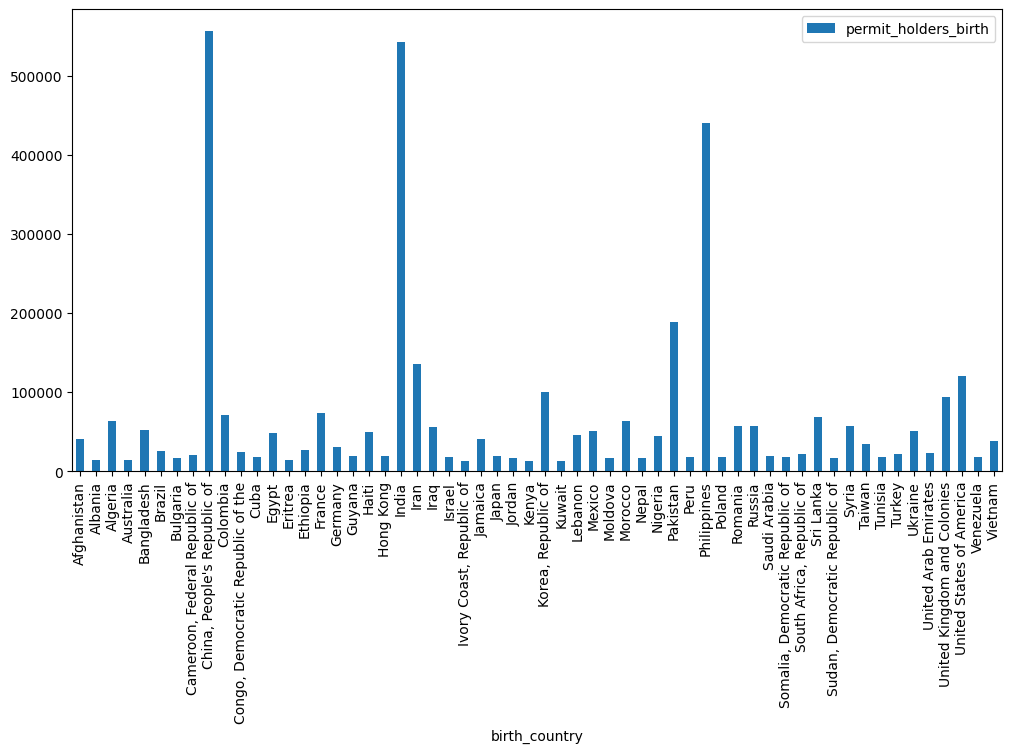

In [435]:
summed_by_birth_country_10_000.plot(
    kind="bar",
    figsize=(12, 6),
    x="birth_country",
);

In [436]:
birth_country_dict = {}
for birth_country, amount in zip(summed_by_birth_country["birth_country"], summed_by_birth_country["permit_holders_birth"]):
    a = amount / total_pr_receivers * 100
    birth_country_dict[birth_country] = round(a.iloc[0], 4)
    print(f"{birth_country} = {round(a.iloc[0], 4)}")

Afghanistan = 0.9589
Albania = 0.3448
Algeria = 1.4977
Angola = 0.0461
Antigua and Barbuda = 0.0092
Argentina = 0.247
Armenia = 0.0915
Aruba = 0.0007
Australia = 0.3276
Austria = 0.0389
Azerbaijan = 0.0858
Azores = 0.0042
Bahama Islands, The = 0.0163
Bahrain = 0.0441
Bangladesh = 1.2306
Barbados = 0.0459
Belarus = 0.1969
Belgium = 0.1475
Belize = 0.0119
Benin, Republic of = 0.0763
Bermuda = 0.0121
Bhutan = 0.102
Bolivia = 0.0447
Bosnia-Herzegovina = 0.1153
Botswana, Republic of = 0.0197
Brazil = 0.6036
Brunei = 0.0101
Bulgaria = 0.3963
Burkina-Faso = 0.0553
Burundi = 0.1966
Cambodia = 0.1206
Cameroon, Federal Republic of = 0.4856
Cape Verde Islands = 0.0003
Cayman Islands = 0.0027
Central African Republic = 0.0226
Chad, Republic of = 0.0382
Chile = 0.141
China, People's Republic of = 12.9856
Colombia = 1.6569
Comoros = 0.0042
Congo, Democratic Republic of the = 0.5734
Congo, People's Republic of the = 0.0454
Costa Rica = 0.0675
Croatia = 0.0865
Cuba = 0.4304
Cyprus = 0.0119
Czech Repub

In [437]:
total = [i for i in birth_country_dict.values()]
sum(total)

100.0003

## **Citizenship**

In [438]:
datasets["raw_data_citizenship"].sample(3)

,permit_holders_citiz,landing_year,citizenship_country
594,345.0,2003,Chile
1294,1630.0,2006,Turkey
1713,785.0,2009,Bulgaria


In [439]:
citizenship_dataset = datasets["raw_data_citizenship"].drop(columns="landing_year")
citizenship_dataset.dropna(inplace=True)

total_pr_receivers = citizenship_dataset.groupby("citizenship_country").sum().sum()

summed_by_citizenship = pd.DataFrame(citizenship_dataset.groupby("citizenship_country").sum()).reset_index()

citizenship_dict = {}
for citizenship, amount in zip(
            summed_by_citizenship["citizenship_country"], summed_by_citizenship["permit_holders_citiz"]
            ):
    a = amount / total_pr_receivers * 100
    citizenship_dict[citizenship] = round(a.iloc[0], 4)
    print(f"{citizenship} = {round(a.iloc[0], 4)}")

Afghanistan = 1.0682
Albania = 0.3435
Algeria = 1.4992
Angola = 0.0435
Antigua and Barbuda = 0.012
Argentina = 0.2537
Armenia = 0.0831
Australia = 0.3986
Austria = 0.0417
Azerbaijan = 0.0628
Bahama Islands, The = 0.0136
Bahrain = 0.0087
Bangladesh = 1.2454
Barbados = 0.0468
Belarus = 0.1626
Belgium = 0.1434
Belize = 0.0145
Benin, Republic of = 0.0783
Bhutan = 0.1563
Bolivia = 0.0413
Bosnia-Herzegovina = 0.106
Botswana, Republic of = 0.0135
Brazil = 0.5965
Brunei = 0.0017
Bulgaria = 0.3887
Burkina-Faso = 0.0626
Burundi = 0.2121
Cambodia = 0.114
Cameroon, Federal Republic of = 0.4884
Cape Verde Islands = 0.0009
Central African Republic = 0.0269
Chad, Republic of = 0.0379
Chile = 0.1356
China, People's Republic of = 12.5252
Colombia = 1.6377
Comoros = 0.0041
Congo, Democratic Republic of the = 0.6078
Congo, People's Republic of the = 0.0415
Costa Rica = 0.0674
Croatia = 0.097
Cuba = 0.4233
Cyprus = 0.0051
Czech Republic = 0.0834
Denmark = 0.0339
Djibouti, Republic of = 0.0437
Dominica = 0

In [440]:
citizenship_10_000 = summed_by_citizenship[summed_by_citizenship.permit_holders_citiz >= 10000]

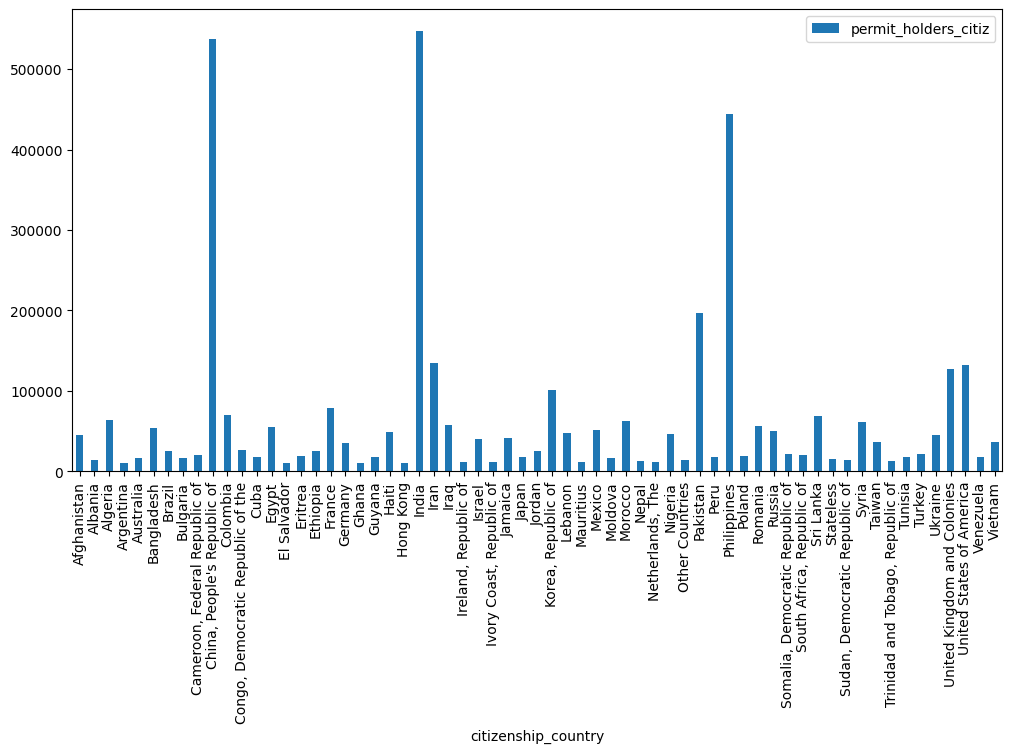

In [441]:
citizenship_10_000.plot(
    kind="bar",
    figsize=(12, 6),
    x="citizenship_country",
);

## **Education**

In [442]:
education_df = datasets["raw_data_education"].drop(columns="landing_year")
# education_df = datasets["raw_data_education"]

In [443]:
education_df.sample(3)

,persons_count_educa,education_qualification_eng_desc
20,3160.0,Doctorate
142,11115.0,Formal Trade Cert. or Apprenticeship
102,3665.0,Doctorate


In [444]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   persons_count_educa               155 non-null    float64
 1   education_qualification_eng_desc  143 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [445]:
nan_rows_df = education_df[education_df['education_qualification_eng_desc'].isna()]
nan_rows_df["persons_count_educa"].sum(), education_df["persons_count_educa"].sum()

(766705.0, 4288980.0)

In [446]:
education_df["education_qualification_eng_desc"].unique()

array(["Bachelor's Degree", 'Doctorate',
       'Formal Trade Cert. or Apprenticeship', "Master's Degree",
       'Non-University Certificate or Diploma', nan, 'Not stated',
       'Secondary or Less', 'Some Post-Grad. Education - No Degree',
       'Some University - No Degree'], dtype=object)

In [447]:
education_dataset = datasets["raw_data_education"].drop(columns="landing_year")
education_dataset.dropna(inplace=True)

total_pr_receivers = education_dataset.groupby("education_qualification_eng_desc").sum().sum()

summed_by_education = pd.DataFrame(education_dataset.groupby("education_qualification_eng_desc").sum()).reset_index()

education_dict = {}
for education, amount in zip(
            summed_by_education["education_qualification_eng_desc"], summed_by_education["persons_count_educa"]
            ):
    a = amount / total_pr_receivers * 100
    education_dict[education] = round(a.iloc[0], 4)
    print(f"{education} = {round(a.iloc[0], 4)}")

Bachelor's Degree = 27.6252
Doctorate = 1.8065
Formal Trade Cert. or Apprenticeship = 4.8869
Master's Degree = 11.0913
Non-University Certificate or Diploma = 9.5086
Not stated = 1.2763
Secondary or Less = 37.9532
Some Post-Grad. Education - No Degree = 1.3836
Some University - No Degree = 4.4684


In [448]:
total = [i for i in education_dict.values()]
sum(total)

100.0

## **Gender**

In [449]:
datasets["raw_data_gender"].sample(3)

,persons_count_gende,landing_year,gender_eng_desc
13,114160.0,2004,Male
44,139295.0,2015,Female
1,112345.0,2000,Male


## **Legal status**

In [450]:
legal_status = datasets["raw_data_legal_status"]

In [451]:
legal_status.sample(3)

,persons_count_main_,landing_year,main_category_eng_desc,group_eng_desc,component_eng_description
113,610.0,2005,Sponsored Family,Sponsored Family,Sponsored Family Member - H&C Consideration
29,3570.0,2001,Resettled Refugee & Protected Person in Canada,Resettled Refugee,Privately Sponsored Refugee
215,15335.0,2010,Sponsored Family,Sponsored Family,Sponsored Parent or Grandparent


In [452]:
legal_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   persons_count_main_        325 non-null    float64
 1   landing_year               347 non-null    int64  
 2   main_category_eng_desc     347 non-null    object 
 3   group_eng_desc             347 non-null    object 
 4   component_eng_description  347 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.7+ KB


In [453]:
legal_status["main_category_eng_desc"].unique()

array(['All Other Immigration', 'Economic',
       'Resettled Refugee & Protected Person in Canada',
       'Sponsored Family'], dtype=object)

In [454]:
legal_status["group_eng_desc"].unique()

array(['Other Immigrants not included elsewhere', 'Business',
       'Provincial Nominee Program', 'Worker Program',
       'Protected Person in Canada', 'Resettled Refugee',
       'Sponsored Family', 'Humanitarian & Compassionate',
       'Public Policy'], dtype=object)

In [455]:
legal_status["component_eng_description"].unique()

array(['Deferred Removal Order Class',
       'Designated Class Backlog Clearance', 'Entrepreneur', 'Investor',
       'Self-Employed', 'Provincial Nominee Program', 'Caregiver',
       'Skilled Worker', 'Dependant of protected person',
       'Post-determination Refugee Claimant', 'Protected Person',
       'Government-Assisted Refugee', 'Privately Sponsored Refugee',
       'Sponsored Children', 'Sponsored Extended Family Member',
       'Sponsored Parent or Grandparent', 'Sponsored Spouse or Partner',
       'Humanitarian & Compassionate', 'Permit Holder Class', 'Retired',
       'Sponsored Family Member - H&C Consideration', 'Public Policy',
       'Canadian Experience', 'Skilled Trade',
       'Blended Sponsorship Refugee', 'Start-up Business',
       'Express Entry'], dtype=object)

In [456]:
legal_status.isna().sum()

persons_count_main_          22
landing_year                  0
main_category_eng_desc        0
group_eng_desc                0
component_eng_description     0
dtype: int64

In [457]:
legal_status.dropna(inplace=True)

In [458]:
legal_status.isna().sum()

persons_count_main_          0
landing_year                 0
main_category_eng_desc       0
group_eng_desc               0
component_eng_description    0
dtype: int64

In [459]:
legal_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 346
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   persons_count_main_        325 non-null    float64
 1   landing_year               325 non-null    int64  
 2   main_category_eng_desc     325 non-null    object 
 3   group_eng_desc             325 non-null    object 
 4   component_eng_description  325 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 15.2+ KB


In [460]:
total_pr_receivers = legal_status.groupby("component_eng_description").sum().sum()[0]

/tmp/ipykernel_40689/1136339921.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_pr_receivers = legal_status.groupby("component_eng_description").sum().sum()[0]


In [461]:
total_pr_receivers

4288935.0

## **Marital status**

In [462]:
datasets["raw_data_marital_status"].sample(5)

,persons_count_marit,landing_year,marital_status_eng_desc
88,45.0,2012,Annulled Marriage
46,1145.0,2006,Separated
90,3120.0,2012,Divorced
47,107865.0,2006,Single
39,1145.0,2005,Separated


## **NOC**

In [463]:
datasets["noc_2011"].sample(5)

,persons_count_noc_2,landing_year,noc_2011_level4_eng_desc
1455,20.0,2003,1252 - Health information management occupations
1473,5.0,2003,1454 - Survey interviewers and statistical clerks
2221,60.0,2004,7612 - Other trades helpers and labourers
6586,120.0,2013,Not stated
2223,5.0,2004,7622 - Railway and motor transport labourers


## **Preferred Language**

In [464]:
datasets["raw_data_preferred_language"].sample(5)

,persons_count_prefe,landing_year,preferred_language_eng_desc
63,174015.0,2015,English
36,27930.0,2009,Bilingual
6,11330.0,2001,French
65,63530.0,2015,NaN
4,13040.0,2001,Bilingual


## **Province**

In [465]:
datasets["raw_data_province"].sample(5)

,persons_count_provi,landing_year,province_long_eng_desc
189,1000.0,2013,Prince Edward Island
234,210.0,2016,Yukon
118,50.0,2008,Nunavut
49,10.0,2003,Nunavut
26,1705.0,2001,Saskatchewan


## **Skill level**

In [467]:
df = datasets["raw_data_skill_level_2"]

In [468]:
df.sample(5)

,persons_count_skill,landing_year,skill_level1_eng_desc,skill_level2_eng_desc
89,305,2008,Not stated,Not stated
123,67500,2012,Intending to work,New Workers (15 Years of Age or Older)
21,41785,2002,Higher-skilled,A - Professionals
4,6620,2000,Lower-skilled,C - Intermediate and Clerical
84,9840,2008,Lower-skilled,C - Intermediate and Clerical


In [469]:
df["skill_level1_eng_desc"].unique()

array(['Higher-skilled', 'Intending to work', 'Lower-skilled',
       'Not intending to work', 'Not stated'], dtype=object)

In [470]:
df["skill_level2_eng_desc"].unique()

array(['0 - Managerial', 'A - Professionals', 'B - Skilled and Technical',
       'New Workers (15 Years of Age or Older)',
       'C - Intermediate and Clerical', 'D - Elemental and Labourers',
       'Others Non-Workers (15 Years of Age or Older)',
       'Retired (15 Years of Age or Older)',
       'Students (15 Years of Age or Older)', 'Not stated'], dtype=object)

## **Normalization**

In [123]:
# Define a column transformer for Z-score normalization
ct = ColumnTransformer([
    ('standard_scaler', StandardScaler(), ['persons_count_perso'])
], remainder='passthrough')

# Apply the transformation
df_transformed = ct.fit_transform(age_dataset)
df_transformed = pd.DataFrame(df_transformed, columns=['persons_count_perso', 'person_age_level1_eng_desc'])
df_transformed.sample(5)

,persons_count_perso,person_age_level1_eng_desc
37,1.042015,15 to 29 years old
13,0.733063,15 to 29 years old
8,1.412696,30 to 44 years old
36,0.285839,0 to 14 years old
5,-1.255064,75 years old or more


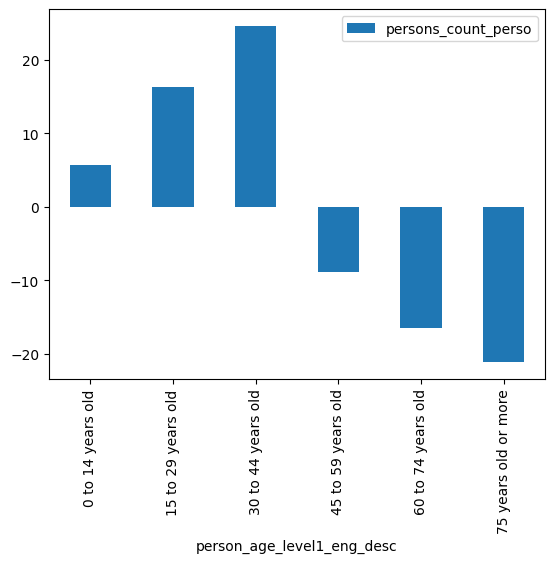

In [124]:
df_transformed.groupby("person_age_level1_eng_desc").sum().plot(kind="bar");

In [125]:
# Define a column transformer MinMax normalization
ct = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['persons_count_perso'])
], remainder='passthrough')

# Apply the transformation
df_transformed = ct.fit_transform(age_dataset)
df_transformed = pd.DataFrame(df_transformed, columns=['persons_count_perso', 'person_age_level1_eng_desc'])
df_transformed.sample(5)

,persons_count_perso,person_age_level1_eng_desc
36,0.481351,0 to 14 years old
10,0.07827,60 to 74 years old
60,0.570209,0 to 14 years old
1,0.643327,15 to 29 years old
28,0.064962,60 to 74 years old


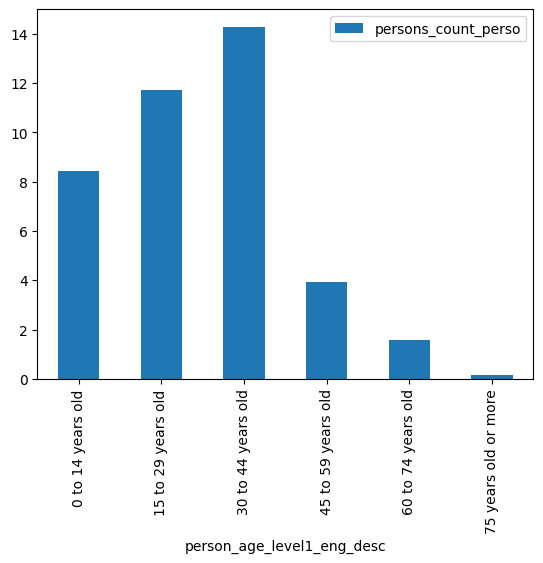

In [126]:
df_transformed.groupby("person_age_level1_eng_desc").sum().plot(kind="bar");

## **CENSUS dataset**

In [9]:
raw_data = pd.read_csv("../data/ODP-PR-CSD.csv", delimiter='\t', index_col=0) # ODP-PR-CSD.csv
raw_data.reset_index(inplace=True)

In [10]:
raw_data.sample(5)

,EN_YEAR,EN_QUARTER,EN_MONTH,FR_ANNEÉ,FR_TRIMESTRE,FR_MOIS,EN_PROVINCE_TERRITORY,FR_PROVINCE_TERRITOIRE,EN_CENSUS_DIVISION,FR_DIVISION_DE_RECENSEMENT,EN_CENSUS_SUBDIVISION,FR_SUBDIVISION_DE_RECENSEMENT,Total
10751,2016,Q3,Aug,2016,T3,août,Ontario,Ontario,Cochrane,Cochrane,Cochrane,Cochrane,5
55571,2022,Q2,May,2022,T2,mai,Ontario,Ontario,Grey,Grey,Southgate,Southgate,--
43379,2021,Q1,Jan,2021,T1,janv.,Prince Edward Island,Île-du-Prince-Édouard,Queens,Queens,Charlottetown,Charlottetown,75
41311,2020,Q4,Dec,2020,T4,déc.,British Columbia,Colombie-Britannique,Comox Valley,Comox Valley,Comox,Comox,--
36333,2019,Q4,Oct,2019,T4,oct.,Manitoba,Manitoba,Division No. 7,Division No. 7,Brandon,Brandon,85


In [11]:
clean_data = raw_data.drop(columns=[
    # 'EN_QUARTER',
    # 'EN_MONTH',
    'FR_ANNEÉ',
    'FR_TRIMESTRE',
    'FR_MOIS',
    # 'EN_PROVINCE_TERRITORY',
    'FR_PROVINCE_TERRITOIRE',
    # 'EN_CENSUS_DIVISION',
    'FR_DIVISION_DE_RECENSEMENT',
    # 'EN_CENSUS_SUBDIVISION',
    'FR_SUBDIVISION_DE_RECENSEMENT'
])

In [12]:
clean_data.sample(5)

,EN_YEAR,EN_QUARTER,EN_MONTH,EN_PROVINCE_TERRITORY,EN_CENSUS_DIVISION,EN_CENSUS_SUBDIVISION,Total
59740,2022,Q4,Oct,Ontario,Northumberland,Port Hope,--
29739,2019,Q1,Jan,Saskatchewan,Division No. 16,Borden,--
35960,2019,Q4,Nov,Quebec,Mirabel,Mirabel,--
56735,2022,Q3,Jul,Ontario,Prescott and Russell,Hawkesbury,--
28661,2018,Q4,Oct,Saskatchewan,Division No. 8,Eston,--


In [13]:
clean_data.rename(columns={column: column.replace("EN_", "").lower() for column in clean_data.columns}, inplace=True)
clean_data.sample(5)

,year,quarter,month,province_territory,census_division,census_subdivision,total
20450,2017,Q4,Nov,Newfoundland and Labrador,Division No. 7,Clarenville,10
7624,2016,Q1,Jan,Saskatchewan,Division No. 15,Humboldt,10
18142,2017,Q3,Aug,Alberta,Division No. 6,Cochrane,5
68006,2023,Q4,Nov,Alberta,Division No. 17,High Prairie,--
18628,2017,Q3,Jul,Ontario,Middlesex,Adelaide-Metcalfe,--


In [14]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69987 entries, 0 to 69986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                69987 non-null  int64 
 1   quarter             69987 non-null  object
 2   month               69987 non-null  object
 3   province_territory  69987 non-null  object
 4   census_division     69987 non-null  object
 5   census_subdivision  69987 non-null  object
 6   total               69987 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [15]:
clean_data.sample()

,year,quarter,month,province_territory,census_division,census_subdivision,total
61699,2023,Q1,Jan,Saskatchewan,Division No. 8,Swift Current,35


In [16]:
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
clean_data["month"] = clean_data["month"].replace(month_to_num)

/tmp/ipykernel_34594/2405731097.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data["month"] = clean_data["month"].replace(month_to_num)


In [17]:
quarter_to_number = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
clean_data["quarter"] = clean_data["month"].replace(quarter_to_number)

In [18]:
clean_data["total"] = clean_data["total"].replace("--", 0)

In [19]:
clean_data["total"] = pd.to_numeric(clean_data["total"])

In [20]:
clean_data["total"].sum()  # with zeros

2980850

In [21]:
# Select indices where values are 0
zero_indices = clean_data.index[clean_data['total'] == 0].tolist()

# Shuffle indices
np.random.shuffle(zero_indices)

# Divide into two parts
mid_point = len(zero_indices) // 2
first_part, second_part = zero_indices[:mid_point], zero_indices[mid_point:]

# Replace values
clean_data.loc[first_part, 'total'] = 1
clean_data.loc[second_part, 'total'] = 2

In [22]:
clean_data["total"].sum()  # with zeros

3045088

In [23]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69987 entries, 0 to 69986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                69987 non-null  int64 
 1   quarter             69987 non-null  int64 
 2   month               69987 non-null  int64 
 3   province_territory  69987 non-null  object
 4   census_division     69987 non-null  object
 5   census_subdivision  69987 non-null  object
 6   total               69987 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [25]:
clean_data.sample(5)

,year,quarter,month,province_territory,census_division,census_subdivision,total
6106,2015,11,11,Ontario,Elgin,St. Thomas,1
42627,2020,10,10,Manitoba,Division No. 2,Ste. Anne,2
3558,2015,8,8,Quebec,Abitibi-Ouest,Macamic,1
19351,2017,9,9,British Columbia,Comox Valley,Courtenay,5
46086,2021,5,5,Quebec,Montréal,Pointe-Claire,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd


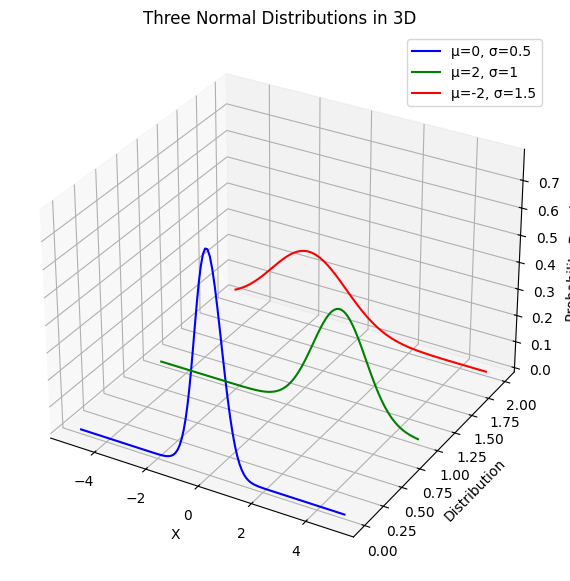

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Parameters for the normal distributions
mu = [0, 2, -2]  # Means of the distributions
sigma = [0.5, 1, 1.5]  # Standard deviations of the distributions
colors = ['blue', 'green', 'red']  # Colors for each distribution

# Create a figure for plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Generating data and plotting each normal distribution
x = np.linspace(-5, 5, 120)
for i in range(len(mu)):
    y = norm.pdf(x, mu[i], sigma[i])
    z = np.full_like(y, i)  # Creating a flat z-axis level for each distribution
    ax.plot(x, y, zs=z, zdir='y', label=f'μ={mu[i]}, σ={sigma[i]}', color=colors[i])

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Distribution')
ax.set_zlabel('Probability Density')
ax.set_title('Three Normal Distributions in 3D')
ax.legend()

# Show plot
plt.show()
